<a href="https://colab.research.google.com/github/marcellinus-witarsah/dogs-vs-cats-model/blob/main/dogs-vs-cats-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs Cats Model 
This project is based on competition from Kaggle which can be accessed using this link https://www.kaggle.com/competitions/dogs-vs-cats. This project aimed to create a model that can classify dogs and cats 

In [1]:
import os
import shutil
import sys
# code for making ensuring kaggle.json existed
os.getcwd()
kaggle_json_folder = os.path.join('/root/.kaggle')

if not os.path.exists(kaggle_json_folder):
  os.mkdir(path=kaggle_json_folder)
  print(kaggle_json_folder + " has been created")
else:
  print(kaggle_json_folder + " already exists.")

try:
  source = os.path.join('/content/kaggle.json')
  target = os.path.join(kaggle_json_folder, 'kaggle.json')
  shutil.copy(source, target)
  print("file copied")
except IOError as e:
    print("Unable to copy file. %s" % e)
except:
    print("Unexpected error:", sys.exc_info())


/root/.kaggle has been created
file copied


## Data Preparation

Pull data from Kaggle using ***kaggle.json*** as its authentication token. Please make sure you have it inside ***/root/.kaggle/kaggle.json***

In [2]:
# download the data
!pip install kaggle
!kaggle competitions download -c dogs-vs-cats


 99% 801M/812M [00:03<00:00, 226MB/s]
100% 812M/812M [00:03<00:00, 220MB/s]


unzip the file and put it inside ***/dataset folder***. This extra folder it is just for preference just to make things look neat in the ***/content*** folder.

In [3]:
# open the dogs-vs-cats.zip file
from zipfile import ZipFile

def extract_zip(filepath):
    """
    Function to open a extract zipped file
    """
    # opening the zip file in READ mode
    with ZipFile(filepath, 'r') as zip:
        #printing all the contents of the zip file
        zip.printdir()
        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall(path=os.path.join(dataset_dir))
        print('Done!')

# specifying the zip file name
file_name = "dogs-vs-cats.zip"

dataset_dir = os.path.join("dataset")
if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)
    print(dataset_dir + " has been created")
    
else:
    print(dataset_dir + " already exists")

if not os.path.exists(os.path.join(dataset_dir, file_name)):
    shutil.move(file_name, dataset_dir)
else:
    print("data has already been moved")

# opening the zip file in READ mode
extract_zip(os.path.join(dataset_dir, file_name))
extract_zip(os.path.join(dataset_dir, "train.zip"))
extract_zip(os.path.join(dataset_dir, "test1.zip"))


Streaming output truncated to the last 5000 lines.
test1/550.jpg                                  2013-09-20 10:12:40        11253
test1/5500.jpg                                 2013-09-20 10:15:26        19488
test1/5501.jpg                                 2013-09-20 10:15:26        14965
test1/5502.jpg                                 2013-09-20 10:15:26        14406
test1/5503.jpg                                 2013-09-20 10:15:26        14957
test1/5504.jpg                                 2013-09-20 10:15:26        15065
test1/5505.jpg                                 2013-09-20 10:15:26         2985
test1/5506.jpg                                 2013-09-20 10:15:26         4349
test1/5507.jpg                                 2013-09-20 10:15:26        27502
test1/5508.jpg                                 2013-09-20 10:15:26        54253
test1/5509.jpg                                 2013-09-20 10:15:26         2312
test1/551.jpg                                  2013-09-20 10:12:40   

## Data Exploration
Exploring the data by seeing the image

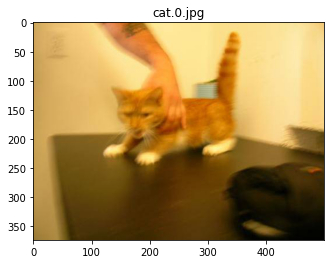

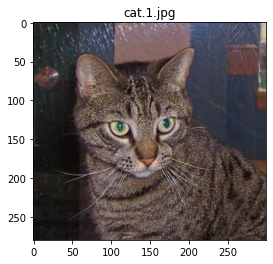

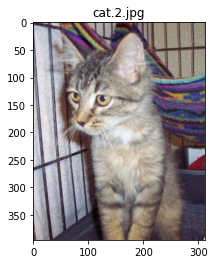

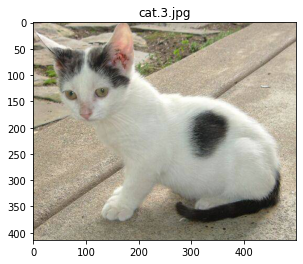

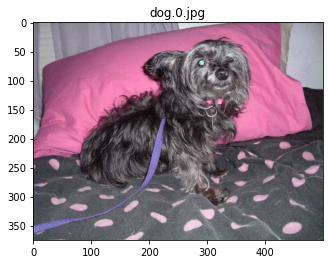

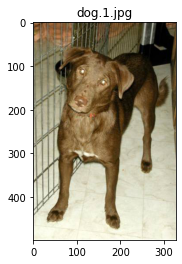

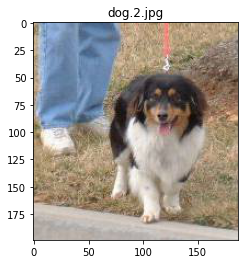

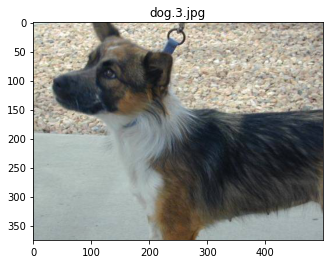

In [4]:
import matplotlib.pyplot as plt

cat_filenames = ['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg']
dog_filenames = ['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg']

for filename in cat_filenames:
  plt.title(filename)
  img = plt.imread(os.path.join('/content/dataset/train', filename))
  plt.imshow(img)
  plt.show()

for filename in dog_filenames:
  plt.title(filename)
  img = plt.imread(os.path.join('/content/dataset/train', filename))
  plt.imshow(img)
  plt.show()

## Data Augmentation
Data augmentationis used to new data of image using different orientation. 

In [5]:
# Create folder based on labels of the data which is cat and dog
# folders
train_folder = '/content/dataset/train'
test1_folder = '/content/dataset/test1'

# filename
cat_folder_name = 'cat'
dog_folder_name = 'dog'

cat_path = os.path.join(train_folder, cat_folder_name)
dog_path = os.path.join(train_folder, dog_folder_name)


def create_folder(path):
  if not os.path.exists(path):
    os.mkdir(path=path)
    print(path + " has been created")
  else:
    print(path + " already exists.")

create_folder(cat_path)
create_folder(dog_path)

for file_name in os.listdir(train_folder):
  destination = os.path.join(train_folder, file_name.split('.')[0], file_name)
  source = os.path.join(train_folder, file_name)

  if file_name == 'dog' or file_name == 'cat':
    continue 

  if not os.path.exists(destination):
    shutil.move(source, destination)
  else:
    print("data has already been moved")

/content/dataset/train/cat has been created
/content/dataset/train/dog has been created


In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Setting a "Global Seed" so that all next operations will be using this seed
tf.random.set_seed(1234)

# Setting constants
WIDTH = 150 #@param {type:"integer"}
HEIGHT = 150 #@param {type:"integer"}
TARGET_SIZE = (WIDTH, HEIGHT)
INPUT_SHAPE = TARGET_SIZE + (3,)
BATCH_SIZE = 32 #@param {type:"integer"}

image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

In [12]:
print(f"Amount file in training folder = {(len(os.listdir(cat_path)) + len(os.listdir(dog_path)))}")

# create a train generator
train_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    shuffle=True,
    subset = 'training',
    class_mode = 'binary'
) 

# create a validation generator
validation_generator = image_generator.flow_from_directory(
    directory = train_folder,
    target_size= TARGET_SIZE,
    batch_size= BATCH_SIZE,
    shuffle=True,
    subset = 'validation',
    class_mode = 'binary'
) 

Amount file in training folder = 25000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


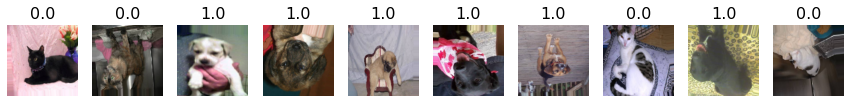

In [10]:
# this part is for seing what is the one-hot-encoding
# that define cat and dog

imgs, labels = next(train_generator)

rows = 1
cols = len(imgs)-22

f = plt.figure(figsize=(15,6))
for i in range(cols):
  sp = f.add_subplot(rows, cols, i+1)
  sp.axis('Off')
  if labels is not None:
    sp.set_title(labels[i], fontsize=16)
  plt.imshow(imgs[i])


From the results above, we can conclude that label ***0.0*** is for ***cat*** and ***1.0*** is for ***dog***

## Architecture Creation
This part will be concerning about the architecture of CNN model

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten


# create model architecture
def get_model(input_shape):
  tf.keras.backend.clear_session()
  return Sequential([
    Conv2D(filters=32, 
           kernel_size=(3,3), 
           activation='relu',
           input_shape=input_shape,
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    Conv2D(filters=64, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, 
           kernel_size=(3,3), 
           activation='relu',
           padding="same",
           ),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
  ]
  )

model = get_model(INPUT_SHAPE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       7

## Model Callbacks

In [14]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler

# create a model checkpoint which will create a file each time
# validation accuracy is improved.
# This will result the same file being updated with the best
# validation accuracy

def get_model_checkpoint(filepath, monitor, mode):
  """
  Function for creating a model checkpoint so that model will be saved if the
  metrics that being monitored perform better than the recent one.
  """
  return ModelCheckpoint(
        filepath=filepath, 
        monitor=monitor,
        mode=mode,
        save_best_only=True,
        verbose=2)

def get_early_stopping(monitor, patience):
  """
  Function for preventing ovefitting if the metric or loss being monitor doesn't
  improve after certain epoch (patience). 
  """
  return EarlyStopping(
      monitor=monitor, 
      patience=patience,
      verbose=2
  )

In [15]:
# Setting parameter for model checkpoint
filepath = '/content/traditional_cnn_model' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

## Model Training


In [16]:
# compile model
epochs = 50 #@param {type: "integer"}

# compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

#train the model
history = model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks
          )

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.6309
Epoch 1: val_accuracy improved from -inf to 0.71640, saving model to /content/traditional_cnn_model
INFO:tensorflow:Assets written to: /content/traditional_cnn_model/assets
625/625 [==============================] - 251s 377ms/step - loss: 0.6299 - accuracy: 0.6309 - val_loss: 0.5596 - val_accuracy: 0.7164
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.7023
Epoch 2: val_accuracy improved from 0.71640 to 0.75460, saving model to /content/traditional_cnn_model
INFO:tensorflow:Assets written to: /content/traditional_cnn_model/assets
625/625 [==============================] - 234s 374ms/step - loss: 0.5656 - accuracy: 0.7023 - val_loss: 0.5155 - val_accuracy: 0.7546
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.5342 - accuracy: 0.7261
Epoch 3: val_accuracy did not improve from 0.75460
625/625 [==============================] -

Best Model for CNN created by myself is 88% training accuracy and 88% validation accuracy. 

## Model Evaluation

In [ ]:
def model_diagnostics(history):
  # plot accuracy
  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='training')
  plt.plot(history.history['val_accuracy'], color='orange', label='validation')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  
  # plot loss
  plt.subplot(212)
  plt.title('Binary Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='training')
  plt.plot(history.history['val_loss'], color='orange', label='validation')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

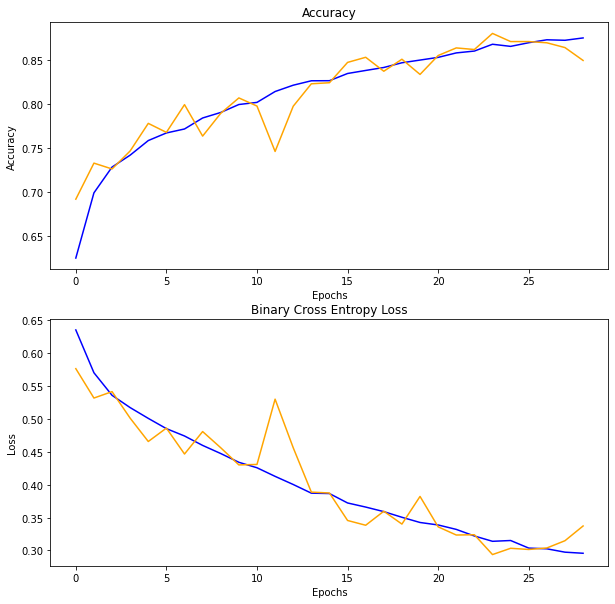

In [ ]:
model_diagnostics(history)

## Predict Test Data for Submission

In [ ]:
# # Install Image Package
# !pip install image
# !python3 -m pip install --upgrade pip
# !python3 -m pip install --upgrade Pillow
!pip install opencv-python


In [ ]:
# from PIL import Image
import numpy as np
import cv2

test_data = {'filename': [],
             'data':[]}
# rescale and resize the images inside the test1 folder
for filename in os.listdir(test1_folder):
  # img = Image.open(os.path.join(test1_folder, filename)) # open image file
  # img = img.resize(TARGET_SIZE) # resize the image
  # img = np.asarray(img)/255 # rescale the image
  img_array = cv2.imread(os.path.join(test1_folder, filename))
  img_array = cv2.cvtColor(img_array ,cv2.COLOR_BGR2RGB)
  new_array = cv2.resize(img_array, TARGET_SIZE)
  new_array = new_array / 255
  # new_array.reshape(-1, 150, 150, 3)
  test_data['filename'].append(filename) # append to an array
  test_data['data'].append(new_array) # append to an array

In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np
# loaded the model
loaded_model = load_model('/content/best_model_1.hdf5')

test_data['label'] = []
# predict the data
for data in test_data['data']:
  # print(key, data)
  data = data.reshape(-1, TARGET_SIZE[0], TARGET_SIZE[1], 3)
  # setting up random threshold for classifying between dog and cat
  if loaded_model.predict(data)[0]>=0.7:
    test_data['label'].append(1)
  else:
    test_data['label'].append(0)


  # test_data['label'].append(int(loaded_model.predict(data)))

In [ ]:
import pandas as pd
submission = pd.DataFrame(test_data)

In [ ]:
# # drop data column
# submission.drop(columns=['data'], inplace=True)
# # change column name from filename to id
# submission.rename(columns={'filename': 'id'}, inplace=True)
# # change the value inside id to a an integer
# submission['id'] = submission['id'].apply(lambda x: int(x.split('.')[0]))
# #  sort based on 'id' it in ascending order
# submission = submission.sort_values(by='id')

In [ ]:
# save the submission dataframe in for of csv and ignore its index
submission.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('submission.csv')

,id,label
0,1,1
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,1


Apparently the submission is unavailable since 2014 so, I can submitted and maybe I can evaluate or model by using 10% of training set later.


## Transfer Learning
Transfer Learning is a way of leveraging model that has been trained on millions of data. It also consist of deep and complex architecture leading to higher accuracy and results

### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(
    weights="imagenet", 
    include_top=False, 
    input_shape=INPUT_SHAPE)

base_model.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import Sequential
from keras.layers import Dense, Flatten
# Adding output of the model according to our case
modified_model = Sequential([
  base_model,
  Flatten(),
  Dense(units= 2048, activation='relu'),                    
  Dense(units= 1024, activation='relu'),                    
  Dense(units= 1, activation='sigmoid'),                    
])

In [ ]:
# Setting parameter for model checkpoint
filepath = '/content/transfer_learning_model.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

In [ ]:
epochs = 50 #@param = {type: 'integer'}
# compile model
modified_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

#train the model
history_modified = modified_model.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks,
          )

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.4460 - accuracy: 0.7855
Epoch 1: val_accuracy improved from -inf to 0.79820, saving model to /content/transfer_learning_model.h5
625/625 [==============================] - 235s 374ms/step - loss: 0.4460 - accuracy: 0.7855 - val_loss: 0.4153 - val_accuracy: 0.7982
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8376
Epoch 2: val_accuracy improved from 0.79820 to 0.82140, saving model to /content/transfer_learning_model.h5
625/625 [==============================] - 239s 382ms/step - loss: 0.3583 - accuracy: 0.8376 - val_loss: 0.3972 - val_accuracy: 0.8214
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.3376 - accuracy: 0.8511
Epoch 3: val_accuracy improved from 0.82140 to 0.85780, saving model to /content/transfer_learning_model.h5
625/625 [==============================] - 236s 377ms/step - loss: 0.3376 - accuracy: 0.8511 - val_loss: 0.3284 - val_acc

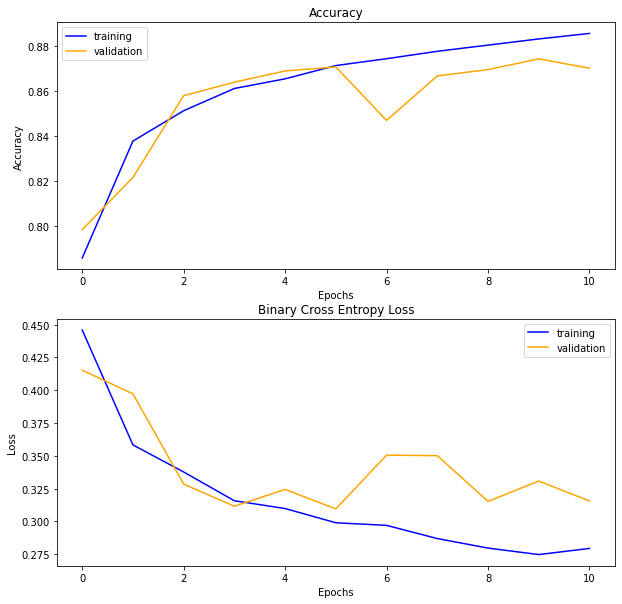

In [ ]:
model_diagnostics(history_modified)


So far the model performed quite well with best training accuracy of 88% and best validation accuracy 87%. But there's gap that might indicate an overfitting 

### Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='max',
    input_shape=INPUT_SHAPE,
)
base_model_resnet.trainable = False

In [ ]:
base_model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool2D

modified_model_resnet = Sequential([
  base_model_resnet,
  Dense(units= 512, activation='relu'),                    
  Dense(units= 1, activation='sigmoid'),                    
])

In [ ]:
# Setting parameter for model checkpoint
filepath = '/content/transfer_learning_resnet_model.h5' #@param {type: "string"}
monitor = 'val_accuracy' #@param {type: "string"}
mode ='max' #@param {type: "string"}
model_checkpoint_callback = get_model_checkpoint(filepath, monitor, mode)

# Setting parameter for early stopping
monitor = 'val_loss' #@param {type: "string"}
patience = 5 #@param {type: "integer"}
model_earlystopping_callback = get_early_stopping(monitor, patience)
callbacks = [model_checkpoint_callback, 
             model_earlystopping_callback,]

In [ ]:
epochs = 50 #@param = {type: 'integer'}
# compile model
modified_model_resnet.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    metrics = ['accuracy']
)

#train the model
history_modified = modified_model_resnet.fit(train_generator,
          epochs=epochs,
          validation_data = validation_generator,
          callbacks=callbacks,
          )

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.5371
Epoch 1: val_accuracy improved from -inf to 0.59900, saving model to /content/transfer_learning_resnet_model.h5
625/625 [==============================] - 239s 371ms/step - loss: 0.8069 - accuracy: 0.5371 - val_loss: 0.6648 - val_accuracy: 0.5990
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5685
Epoch 2: val_accuracy improved from 0.59900 to 0.61400, saving model to /content/transfer_learning_resnet_model.h5
625/625 [==============================] - 224s 359ms/step - loss: 0.6836 - accuracy: 0.5685 - val_loss: 0.6559 - val_accuracy: 0.6140
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.5827
Epoch 3: val_accuracy did not improve from 0.61400
625/625 [==============================] - 226s 362ms/step - loss: 0.6746 - accuracy: 0.5827 - val_loss: 0.6689 - val_accuracy: 0.5842
Epoch 4/50
625/625 [=========